# Capstone Project - The Battle Of Neighborhoods(Week 2)
### Applied Data Science Capstone By IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

In this project we will compare 5 different cities of India. These cities are **Mumbai**, **Delhi**, **Bangalore**, **Pune** and **Chennai**. The comparison will be based on **neighborhood containing different category of venues.** 

This project will be targeted to stakeholders interested in opening their new branch in any of these cities. Clients which are moving from one city to another permanently and trying to find the same neighborhood as they are currently living in. Since These cities are most dynamic and densely populated cities of India, it really hard to find the appropriate neighborhood.

We will use the power of available data to **compare the neighborhoods** in all these cities. After analysing the similarity and dissimilarity among these cities our clients can short list few neighborhoods of their choice and do further on spot analysis.

## Data <a name="data"></a>

Based on definition of our problem, factors that will require to compare the differen cities are:

- Different Neighborhoods in cities.
- Different venues in each of those cities.
- Category or Type of different venues.

Following data sources will be needed to extract/generate the required information:

- Neighborhoods of different cities will be scraped from **wikipedia pages** of those cities.
- coordinate of city centers will be obtained using **geolocator** library of python.
- Venues and their category in different Neighborhoods will be obtained using **Foursquare API**.

 ### Data collection for all the cities

In this part we will collect data by scraping wikipedia pages of all 5 cities. We will go through all the cities in following order **Mumbai**, **Pune**, **Chennai**, **Bangalore** and **Delhi**. For the neighborhoods we will scrape wikipedia pages and then use a **Mapquest api** to get the geographical codes of the neighborhood i.e. Latitude and Longitude.

#### Mumbai

For the data of Mumbai we only need to scrape the wikipedia pages because it also contains the Latitude and Longitude details of the neighborhoods.
<a>https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Mumbai<a> data on this page is in the tabular format hence, we can use pandas to scrape the table directly into dataframe.

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import json


In [2]:
# scraping with read_html()
mumbai_neighborhoods = pd.read_html(io = "https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Mumbai", header = 0, index_col = None)
mumbai_neighborhoods= mumbai_neighborhoods[0]# first table on the page
print("There are total {} neighborhoods in Mumbai city.\n\n".format(mumbai_neighborhoods.shape[0]))
mumbai_neighborhoods.head()

There are total 93 neighborhoods in Mumbai city.




,Area,Location,Latitude,Longitude
0,Amboli,"Andheri,Western Suburbs",19.129300,72.843400
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833
2,D.N. Nagar,"Andheri,Western Suburbs",19.124085,72.831373
3,Four Bungalows,"Andheri,Western Suburbs",19.124714,72.827210
4,Lokhandwala,"Andheri,Western Suburbs",19.130815,72.829270


We will make the dataframe in general form which will have columns named as **Neighborhood**, **Latitude**, **Longitude**.

In [3]:
mumbai_neighborhoods.rename(columns= {'Area':'Neighborhood'}, inplace = True)
mumbai_neighborhoods.drop(['Location'], axis= 1, inplace = True)
mumbai_neighborhoods.head()

,Neighborhood,Latitude,Longitude
0,Amboli,19.129300,72.843400
1,"Chakala, Andheri",19.111388,72.860833
2,D.N. Nagar,19.124085,72.831373
3,Four Bungalows,19.124714,72.827210
4,Lokhandwala,19.130815,72.829270


Now that our dataframe for one city is ready, we will plot it on Map to visulize how it is distributed on the geographical surface. We will get the location of mumbai city with **geopy** package in python.

In [4]:
from geopy.geocoders import Nominatim

address = 'Mumbai, IN'
geolocator = Nominatim(user_agent= "Mu_explorer")
location= geolocator.geocode(address)
longitude = location.longitude
latitude = location.latitude
print("The geographical coordinates of Mumbai city are: {}, {}".format(latitude, longitude))

The geographical coordinates of Mumbai city are: 18.9387711, 72.8353355


In [5]:
import folium # library for plotting the map

map_mumbai = folium.Map(location = [latitude, longitude], zoom_start= 10)

# adding the datpoints or neighborhoods on the map
for lat, lng, neighborhood in zip(mumbai_neighborhoods['Latitude'], mumbai_neighborhoods['Longitude'], mumbai_neighborhoods['Neighborhood']):
    label = '{}, Mumbai, IN'.format(neighborhood)
    label = folium.Popup(label, parse_html= True)
    folium.CircleMarker(
                    [lat, lng],
                    radius = 5,
                    popup = label,
                    color= 'blue',
                    fill= True,
                    fill_color= "#ffe7f4",
                    fill_opacity= 0.5,
                    parse_html= False).add_to(map_mumbai)
    
    
map_mumbai

In the visualization we can see there are 8 neighborhoods which are not in mumbai city. Namely these neighborhoods are **Virar**, **Nalasopara**, **Naigaon**, **Dongri**, **Uttan**, **Bhayander**, **Mira Road** and **Thane**. There is one more **'Nehru Nagar'** which is going outside the mumbai and one **Hindu colony** going at another continent . We will delete these rows.

In [6]:
del_rows = ['Virar', 'Nalasopara', 'Naigaon', 'Dongri', 'Uttan', 'Bhayandar', 'Mira Road', 'Thane', 'Nehru Nagar', 'Hindu colony']
mask_del = [(neigh not in del_rows) for neigh in mumbai_neighborhoods['Neighborhood']] # creating the mask for deletion
mumbai_neighborhoods = mumbai_neighborhoods[mask_del]
mumbai_neigh_count = mumbai_neighborhoods.shape[0]
print('==========================================================')
print("There are {} neighborhoods in the Mumbai city".format(mumbai_neigh_count))
print('==========================================================')

mumbai_neighborhoods.head()

There are 83 neighborhoods in the Mumbai city


,Neighborhood,Latitude,Longitude
0,Amboli,19.129300,72.843400
1,"Chakala, Andheri",19.111388,72.860833
2,D.N. Nagar,19.124085,72.831373
3,Four Bungalows,19.124714,72.827210
4,Lokhandwala,19.130815,72.829270


We will plot the neighborhoods once again to be sure we got rid of the neighborhoods outside mumbai

In [7]:
import folium # library for plotting the map

map_mumbai = folium.Map(location = [latitude, longitude], zoom_start= 10)

# adding the datpoints or neighborhoods on the map
for lat, lng, neighborhood in zip(mumbai_neighborhoods['Latitude'], mumbai_neighborhoods['Longitude'], mumbai_neighborhoods['Neighborhood']):
    label = '{}, Mumbai, IN'.format(neighborhood)
    label = folium.Popup(label, parse_html= True)
    folium.CircleMarker(
                    [lat, lng],
                    radius = 5,
                    popup = label,
                    color= 'blue',
                    fill= True,
                    fill_color= "#ffe7f4",
                    fill_opacity= 0.5,
                    parse_html= False).add_to(map_mumbai)
    
    
map_mumbai

By looking at the map it seems everything is perfectly set up for Mumbai city. Now let's move on to another city.

### Pune

On the wikipedia page <a>https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Pune</a> does't contain the table hence, we will use **requests** package of python along with **bs4** i.e. Beautiful soup to get the list of neighborhoods. For Latitude and Longitude we will use **Opencagedata api**. For all four cities same procedure will be followed hence we will define some functions so that we can use it repeatedly. 

In [8]:
# importing the required library
import urllib.request, urllib.parse, urllib.error
import ssl

# function to get the html of wikipedia page
def web_scrape(url):
    cts = ssl.create_default_context()
    cts.check_hostname = False
    cts.verify_mode = ssl.CERT_NONE

    return(urllib.request.urlopen(url,context= cts).read().decode())

In [9]:
url= "https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Pune"
pune_html = web_scrape(url)

In [10]:
from bs4 import BeautifulSoup as BS

pune_soup = BS(pune_html, 'html.parser')
pune_soup


<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of neighbourhoods in Pune - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"b0299e20-81a8-4c14-b2be-95b3dfa8c4b9","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_neighbourhoods_in_Pune","wgTitle":"List of neighbourhoods in Pune","wgCurRevisionId":948698448,"wgRevisionId":948698448,"wgArticleId":10345898,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Use dmy dates from July 2019","Articles needing additional references from August 2011","All articles needing addit

We can see the neighborhoods we are interested in is in the list tags

In [11]:
pune_neigh = pune_soup.find_all('li')
pune_neighborhood= [] # list to store the neighborhoods

for li in pune_neigh:
    pune_neighborhood.append(li.get_text())
    
# now we only need the list from Ambegaon to Varale
pune_neighborhood = pune_neighborhood[pune_neighborhood.index('Ambegaon'):(pune_neighborhood.index('Varale')+1)]

#convert it into dataframe
pune_neighborhood = pd.DataFrame({'Neighborhood': pune_neighborhood})

pune_neighborhood.head()

,Neighborhood
0,Ambegaon
1,Aundh
2,Baner
3,Bavdhan Khurd
4,Bavdhan Budruk


Now we need to get the **Latitude** and **Longitude** details of the neighborhoods. With geographical coordinates we can use the **Foursquare API**.

In [12]:
# importing the required libraries
import requests
import json

# function to request the api for latitude and longitude
# and forming a dataframe of neighborhood along with Latitude and Longitude columns
def get_lat_lng(city,state, df):
    list_lat=[]
    list_lng=[]
    list_neigh = []
   
    address = '{},{}, India'.format(city, state)
    api_key= "fa38eb86a7cc4ed69e0e02c3a039a85e"
    
    # getting the latitude and longitude baoundaries of the city
    url = 'https://api.opencagedata.com/geocode/v1/json?q={}&key={}'.format(address, api_key)
    res_ob = requests.get(url)
    res= res_ob.json()
    ne_lat = res['results'][0]['bounds']['northeast']['lat']
    sw_lat = res['results'][0]['bounds']['southwest']['lat']
    ne_lng = res['results'][0]['bounds']['northeast']['lng']
    sw_lng = res['results'][0]['bounds']['southwest']['lng']
    
    for loc in df['Neighborhood']:
        location = '{},{},{}, India'.format(loc, city, state)
        url = 'https://api.opencagedata.com/geocode/v1/json?q={}&key={}'.format(location, api_key)
        response = requests.get(url)
        json_response = response.json()
        lat = json_response['results'][0]['geometry']['lat']
        lng = json_response['results'][0]['geometry']['lng']
        
        # Applying the condition so that only the Latitude and Longitude which are in city can be added and others are ignored
        # because sometimes api misiterprets the address for some other location with almost same address
        if (ne_lat >= lat and sw_lat <= lat and ne_lng >= lng and sw_lng <= lng):
            list_lat.append(lat)
            list_lng.append(lng)
            list_neigh.append('{}'.format(loc))
        else:
            continue
        
    new_df = pd.DataFrame({'Neighborhood':list_neigh, 
                           'Latitude': list_lat,
                          "Longitude": list_lng})
    return new_df
    

In [13]:
# requesting the  latitude and longitude of the pune city neighborhood
pune_neighborhood = get_lat_lng('Pune','Maharashtra', pune_neighborhood)

pune_neigh_count = pune_neighborhood.shape[0]
print('=======================================================================')
print('There are {} Neighborhoods in Pune city'.format(pune_neigh_count))
print('=======================================================================')
pune_neighborhood.head()

There are 68 Neighborhoods in Pune city


,Neighborhood,Latitude,Longitude
0,Aundh,18.561883,73.810196
1,Baner,18.564243,73.776857
2,Bavdhan Budruk,18.529135,73.778700
3,Balewadi,18.582027,73.768983
4,Bhamburde (now called Shivajinagar),18.519570,73.855350


In [14]:
from geopy.geocoders import Nominatim

# function to get the latitude and longitude of the city for plottting it on map
def city_lat_lng(city, state):
    adress = '{}, {}, IN'.format(city, state)
    geolocator = Nominatim(user_agent= 'city_explorer')
    location= geolocator.geocode(adress)
    longitude = location.longitude
    latitude = location.latitude
    return (latitude, longitude)


In [15]:
pune_lat, pune_lng = city_lat_lng('Pune', 'Maharashtra')
print('The geographical coordinates of Pune city are: {}, {}'.format(pune_lat, pune_lng))

The geographical coordinates of Pune city are: 18.521428, 73.8544541


In [16]:
import folium # library to create the map

# function to create the map of city along with latitude and longitudes
def plot_city_map(city,city_lat, city_lng, city_neighborhood):
    # creating the map
    city_map = folium.Map(location=[city_lat, city_lng], zoom_start = 11)
    
    # adding neighborhoods markers on the map
    for lat, lng, neighborhoods in zip(city_neighborhood['Latitude'], city_neighborhood['Longitude'], city_neighborhood['Neighborhood']):
        
        #labels to popup on click
        label = '{}, {}'.format(neighborhoods, city)
        label = folium.Popup(label, parse_html= True)
        #creating circle markers for neighborhoods
        folium.CircleMarker(
                        [lat,lng],
                        radius = 5,
                        popup = label,
                        color = 'red',
                        fill = True,
                        fill_color =  "#c3186cc",
                        fill_opacity = 0.5,
                        parse_html= False).add_to(city_map)
    return city_map
        

In [17]:
pune_map = plot_city_map('Pune', pune_lat,pune_lng, pune_neighborhood)
pune_map

That look's good. After zooming out no markers are outside the pune. Now we can move on to the next city.

### Delhi

The methodology for **Delhi** will be same as **Pune**.

In [18]:
url= "https://en.wikipedia.org/wiki/Neighbourhoods_of_Delhi"
delhi_html = web_scrape(url)
delhi_soup = BS(delhi_html, 'html.parser')
delhi_soup


<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Neighbourhoods of Delhi - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"83a9f3ad-96f0-4c7f-86e4-e6de77c175f5","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Neighbourhoods_of_Delhi","wgTitle":"Neighbourhoods of Delhi","wgCurRevisionId":962341627,"wgRevisionId":962341627,"wgArticleId":7375737,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Use dmy dates from December 2018","Use Indian English from January 2016","All Wikipedia articles written in Indian English","Commons cate

In [19]:
delhi_neigh = delhi_soup('a') # the data we are interested in is in the anchor tags
delhi_neighborhood = [] # list to save the neighborhoods
for tag in delhi_neigh:
    delhi_neighborhood.append(tag.get('title', None))
delhi_neighborhood

[None,
 None,
 None,
 None,
 'Enlarge',
 'Districts of Delhi',
 'Delhi',
 'National Capital Territory of Delhi',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 'North West Delhi',
 'Edit section: North West Delhi',
 'Adarsh Nagar',
 'Ashok Vihar',
 'Begum Pur',
 'Karala, Delhi',
 'Model Town (Delhi)',
 'Narela',
 'Pitam Pura',
 'Rohini Sub City',
 'Shalimar Bagh, Delhi',
 'North Delhi',
 'Edit section: North Delhi',
 'Civil Lines, Delhi',
 'Gulabi Bagh',
 'Kamla Nagar',
 'Kashmirite (Delhi) (page does not exist)',
 'Kotwali',
 'Mori Gate; Delhi (page does not exist)',
 'Sadar Bazaar, Delhi',
 'Sarai Rohilla',
 'Shakti Nagar, Delhi',
 'Shastri Nagar (Delhi) (page does not exist)',
 'Tis Hazari',
 'Timarpur',
 'Wazirabad, Delhi',
 'North East Delhi',
 'Edit section: North East Delhi',
 'Dilshad Garden',
 'Naveen Shahdara',
 'Shahdara',
 'Shastri Park',
 'Yamuna Vihar',
 'Central Delhi',
 'Edit section: Central Delhi',
 'Chandni Chowk',
 'Daryaganj',


In [20]:
# we want only from adarsh nagar to vikaspuri (an observation from wikipedia page)
delhi_neighborhood = delhi_neighborhood[delhi_neighborhood.index('Adarsh Nagar'):(delhi_neighborhood.index('Vikaspuri')+1)]

# we don't need some section heading such as 'North Delhi'. 
# entries to delte are in below list
del_rows = ['North Delhi', 'Edit section: North Delhi', 'North East Delhi', 'Edit section: North East Delhi', 'Central Delhi', 'Edit section: Central Delhi', 'New Delhi', 'Edit section: New Delhi', 'East Delhi', 'Edit section: East Delhi', 'South Delhi', 'Edit section: South Delhi', 'South West Delhi', 'Edit section: South West Delhi', 'West Delhi', 'Edit section: West Delhi']
delhi_neighborhood = [neigh for neigh in delhi_neighborhood if neigh not in del_rows]

# convert it into dataframe
delhi_neighborhood = pd.DataFrame({'Neighborhood':delhi_neighborhood})

print(delhi_neighborhood.head())
print('=============================================================')
print(delhi_neighborhood.tail())

         Neighborhood
0        Adarsh Nagar
1         Ashok Vihar
2           Begum Pur
3       Karala, Delhi
4  Model Town (Delhi)
            Neighborhood
99          Punjabi Bagh
100       Rajouri Garden
101        Tihar Village
102  Tilak Nagar (Delhi)
103            Vikaspuri


Now we will get the **Latitude** and **Longitude** of the neighborhoods.

In [21]:
delhi_neighborhood = get_lat_lng('Delhi', 'Delhi',delhi_neighborhood)

delhi_neigh_count = delhi_neighborhood.shape[0]
print('============================================================')
print('There are {} neighborhoods in Delhi city'.format(delhi_neigh_count))
print('============================================================')
delhi_neighborhood.head()

There are 100 neighborhoods in Delhi city


,Neighborhood,Latitude,Longitude
0,Adarsh Nagar,28.614193,77.071541
1,Ashok Vihar,28.699453,77.184826
2,Begum Pur,28.653810,77.228970
3,Model Town (Delhi),28.702714,77.193991
4,Pitam Pura,28.703268,77.132250


In [22]:
# get the latitude and longitude of delhi to plot the map
delhi_lat, delhi_lng = city_lat_lng('Delhi', 'Delhi')
print('The geographical coordinates of delhi city are: {}, {}'.format(delhi_lat, delhi_lng))

The geographical coordinates of delhi city are: 28.6517178, 77.2219388


In [23]:
# plotting the neighborhoods on city map
delhi_map = plot_city_map('Delhi', delhi_lat, delhi_lng, delhi_neighborhood)
delhi_map

On zooming out everything looks fine.There are no points outside the city. let's move on to the next city.

### Chennai

Methodology is same as **'Delhi'** or **'Pune'**.

In [24]:
# scraping wikipedia page
chennai_url = "https://en.wikipedia.org/wiki/List_of_neighbourhoods_of_Chennai"
chennai_html = web_scrape(chennai_url)

In [25]:
chennai_soup = BS(chennai_html, 'html.parser')
chennai_soup


<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of neighbourhoods of Chennai - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"350bcabc-160f-46fb-b1d8-fda9bacd388d","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_neighbourhoods_of_Chennai","wgTitle":"List of neighbourhoods of Chennai","wgCurRevisionId":963701809,"wgRevisionId":963701809,"wgArticleId":9736473,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Use dmy dates from February 2019","Use Indian English from February 2019","All Wikipedia articles written i

We can see the data we are interested in is in the **List** tag. Hence we will get the **'li'** tag and filter it only for the neighborhoods.

In [26]:
chennai_li = chennai_soup('li')
chennai_neighborhood  = [] # list to store the neighborhoods
for li in chennai_li:
    chennai_neighborhood.append(li.get_text())

chennai_neighborhood

['1 North Chennai',
 '2 West Chennai',
 '3 South and East Chennai',
 '4 Suburban Chennai',
 '5 Northern Suburbs of Chennai',
 '6 Western Suburbs of Chennai',
 '7 Southern-western Suburbs of Chennai',
 '8 Suburbs along ECR and OMR of Chennai',
 '9 Satellite Towns',
 '10 Important Roads of Chennai',
 '11 References',
 'Red Hills',
 'Royapuram',
 'Korukkupet',
 'Vyasarpadi',
 'Tondiarpet',
 'Tiruvottiyur',
 'Ennore',
 'Minjur',
 'Old Washermenpet',
 'Madhavaram',
 'Manali New Town',
 'Naravarikuppam',
 'Sowcarpet',
 'Puzhal',
 'Moolakadai',
 'Central',
 'Kodungaiyur',
 'Madhavaram Milk Colony',
 'Mathur MMDA',
 'Kolathur',
 "Parry's Corner",
 'Purasawalkam',
 'Perambur',
 'Manali',
 'Vallalar Nagar',
 'New Washermenpet',
 'Mannadi',
 'George Town',
 'Basin Bridge',
 'Park Town',
 'Periametu',
 'Choolai',
 'Veppery',
 'Pattalam',
 'Pulinanthope',
 'M.K.B Nagar',
 'Selavoyal',
 'Manjambakkam',
 'Ponniammanmedu',
 'Sembiam',
 'T.V.K Nagar',
 'ICF Colony',
 'Lakshmipuram',
 'Oragadam',
 'Ayap

In [27]:
# we need the list only  from 'Red Hills', to 'Siruseri'
chennai_neighborhood = chennai_neighborhood[chennai_neighborhood.index('Red Hills'):(chennai_neighborhood.index('Siruseri')+1)]

# convert list into dataframe
chennai_neighborhood = pd.DataFrame({'Neighborhood':chennai_neighborhood})

print('================It starts from Red Hills===============')
print(chennai_neighborhood.head())
print('================It ends with Siruseri==================')
print(chennai_neighborhood.tail())

================It starts from Red Hills===============
  Neighborhood
0    Red Hills
1    Royapuram
2   Korukkupet
3   Vyasarpadi
4   Tondiarpet
================It ends with Siruseri==================
    Neighborhood
157     Kanathur
158    Muttukadu
159  Kelambakkam
160      Kovalam
161     Siruseri


Now let's get the **Latitude** and **Longitude** details of the neighborhoods in delhi from **Opencage API**.

In [28]:
chennai_neighborhood = get_lat_lng('Chennai', 'Tamil Nadu', chennai_neighborhood)

# no. of neigborhoods in chennai
chennai_neigh_count = chennai_neighborhood.shape[0]
print('===================================================================')
print('There are {} neighborhoods in Chennai city'.format(chennai_neigh_count))
print('===================================================================')
chennai_neighborhood.head()

There are 139 neighborhoods in Chennai city


,Neighborhood,Latitude,Longitude
0,Red Hills,13.177820,80.234483
1,Royapuram,13.114619,80.294028
2,Korukkupet,13.121534,80.283791
3,Vyasarpadi,13.116973,80.257124
4,Tondiarpet,13.127767,80.289585


Now let's get **Latitude** and **Longitude** of the city for plotting the map.

In [29]:
chennai_lat, chennai_lng = city_lat_lng('Chennai' , 'Tamil Nadu')
print('The geographical coordinates of Chennai city are : {}, {}'.format(chennai_lat, chennai_lng))

The geographical coordinates of Chennai city are : 13.0801721, 80.2838331


In [30]:
# let's plot the neighborhoods on map of chennai
chennai_map = plot_city_map('Chennai', chennai_lat, chennai_lng, chennai_neighborhood)
chennai_map

On zooming out we can see no markers are outside the city. Now we can move onto the next city which is **Bengaluru**.

### Bengaluru

On the wikipedia page of Bengaluru data is given in form of tables. We can use pandas to read the tables directly into dataframes.

In [31]:
bengaluru_url = "https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Bangalore"
bengaluru_df = pd.read_html(io = bengaluru_url, header=0, index_col = None)
bengaluru_df[0].head()

,Name,Image,Summary
0,Cantonment area,NaN,The Cantonment area in Bangalore was used as a...
1,Domlur,NaN,"Formerly part of the Cantonment area, Domlur h..."
2,Indiranagar,NaN,Indiranagar is a sought-after residential and ...
3,Jeevanbheemanagar,NaN,NaN
4,Malleswaram,NaN,NaN


After observing the wikipedia page we can see neighborhoods are given in 8 different tables. Hence we will combine them into one dataframe. We will also delete the **Summary** and **Image** columns from the dataframe.

In [32]:
#creating the new dataframe 
bengaluru_neighborhood = pd.DataFrame(columns = ['Name'])

n_tables = 8 # no. of dataframes to merge
for n in range(n_tables):
    bengaluru_df[n].drop(columns = ['Image', 'Summary'], inplace = True)
    bengaluru_neighborhood = bengaluru_neighborhood.append(bengaluru_df[n], ignore_index = True)

# changing the column name from 'Name' to 'Neighborhood'
bengaluru_neighborhood.rename(columns = {'Name':'Neighborhood'}, inplace= True)

bengaluru_neighborhood.head()

,Neighborhood
0,Cantonment area
1,Domlur
2,Indiranagar
3,Jeevanbheemanagar
4,Malleswaram


Now we will get the **Latitudes** and **Longitudes** of the neighborhoods in bengaluru city.

In [33]:
bengaluru_neighborhood = get_lat_lng('Bangalore', 'Karnataka', bengaluru_neighborhood)

# no. of neighborhoods in bengaluru
bengaluru_neigh_count = bengaluru_neighborhood.shape[0]
print('====================================================')
print('There are {} neighborhoods in Bengaluru city'.format(bengaluru_neigh_count))
print('====================================================')
bengaluru_neighborhood.head()

There are 63 neighborhoods in Bengaluru city


,Neighborhood,Latitude,Longitude
0,Cantonment area,13.019567,77.509589
1,Domlur,12.962467,77.638196
2,Indiranagar,12.973291,77.640467
3,Jeevanbheemanagar,12.971940,77.593690
4,Malleswaram,13.016341,77.558664


Now we will get the **Latitude** and **Longitude** of the city to plot the map

In [34]:
bengaluru_lat, bengaluru_lng = city_lat_lng('Bangalore', 'Karnataka')
print("The geographical coordinates of Bengaluru city are: {}, {}".format(bengaluru_lat, bengaluru_lng))

The geographical coordinates of Bengaluru city are: 12.9791198, 77.5912997


In [35]:
# add the neighborhoods on the map of city
map_bengaluru = plot_city_map('Bangalore', bengaluru_lat, bengaluru_lng,bengaluru_neighborhood)
map_bengaluru

Now our data for all 5 cities are ready and we can move onto gathering the venues details of neighborhoods from **Foursquare API** .

We will merege all the 5 cities neighborhood dataframe. On the dataframe of all cities combined we will gather the venues detatils for all neighborhoods. We will get the category of neighborhoods. On the basis of category of venues we will cluster our data

### Foursquare API

combine all 5 city dataframe.

In [36]:
mp_df = mumbai_neighborhoods.append(pune_neighborhood, ignore_index = True) # Mumbai-pune combined dataframe
mpd_df = mp_df.append(delhi_neighborhood, ignore_index = True) # mumbai-pune-delhi combined
mpdc_df = mpd_df.append(chennai_neighborhood, ignore_index = True) # mumbai-pune-delhi-chennai combined
mpdcb_df = mpdc_df.append(bengaluru_neighborhood, ignore_index = True) # mumbai-pune-delhi-chennnai-benagaluru combined

In [37]:
total_neighborhoods = mpdcb_df.shape[0]
print('====================================================')
print('There are total {} neighborhoods in all 5 cities combined.'.format(total_neighborhoods))
print('====================================================')

There are total 453 neighborhoods in all 5 cities combined.


In [38]:
CLIENT_ID = 'HC0MNTCQ2OAIJMQNBA5SR32J1GUI1NZY0FFMOKKCNJLKJBM1' # your Foursquare ID
CLIENT_SECRET = 'S44RSONJD2NUUYAZ3IM04CB5QYDAGZUWVYNRJOPU5PYSNOCZ' # your Foursquare Secret
VERSION = '20200621' # Foursquare API version
LIMIT = 100
radius = 500

Now let's explore the first neighborhood of combined dataframe using **Foursquare API**.

In [39]:
mpdcb_df.loc[0, "Neighborhood"]

'Amboli'

In [40]:
# exploreing amboli
latitude = mpdcb_df.loc[0, 'Latitude']
longitude = mpdcb_df.loc[0, 'Longitude']
neighborhood_name = mpdcb_df.loc[0, 'Neighborhood']

# formating the url
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)

In [41]:
results = requests.get(url)
res = results.json()
res

{'meta': {'code': 200, 'requestId': '5efdf0c74153fb4629bbc787'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Jogeshwari West',
  'headerFullLocation': 'Jogeshwari West, Mumbai',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 7,
  'suggestedBounds': {'ne': {'lat': 19.133800004500007,
    'lng': 72.8481541179506},
   'sw': {'lat': 19.124799995499995, 'lng': 72.8386458820494}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4e4eb3c68877402b06b92160',
       'name': '5 Spice , Bandra',
       'location': {'address': 'Pali Naka, Bandra west',
        'lat': 19.130421080343595,
        'lng': 72.84720633881638,
        'labeledLatLngs': [{'label': 'display',
      

Now let's see the venues returned by the **Foursquare API** for 'amboli'.

In [42]:
venues = res['response']['groups'][0]['items']
venues

[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '4e4eb3c68877402b06b92160',
   'name': '5 Spice , Bandra',
   'location': {'address': 'Pali Naka, Bandra west',
    'lat': 19.130421080343595,
    'lng': 72.84720633881638,
    'labeledLatLngs': [{'label': 'display',
      'lat': 19.130421080343595,
      'lng': 72.84720633881638}],
    'distance': 419,
    'cc': 'IN',
    'city': 'Mumbai',
    'state': 'Mahārāshtra',
    'country': 'India',
    'formattedAddress': ['Pali Naka, Bandra west',
     'Mumbai',
     'Mahārāshtra',
     'India']},
   'categories': [{'id': '4bf58dd8d48988d145941735',
     'name': 'Chinese Restaurant',
     'pluralName': 'Chinese Restaurants',
     'shortName': 'Chinese',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_',
      'suffix': '.png'},
     'primary': True}],
   'photos': {'count': 0, 'groups': []}},
  'referr

Now we will define the function for extracting the venues category

In [43]:
# function that extracts the category of venues
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else: 
        return categories_list[0]['name']

Now we will create the function to get nearby venues of all the neighborhoods in dataframe. The function will return the dataframe conataining the columns **Neighborhood**, **Neighborhood Latitude**, **Neighborhood Longitude**, **Venue**, **Venue Latitude**, **Venue Longitude** and **Venue Cateogry**.

In [44]:
def get_nearby_venues(neighborhoods, latitudes, longitudes, radius=500):
    venues_list=[]
    for i,(neigh, lat, lng) in enumerate(zip(neighborhoods, latitudes, longitudes)):
        print("{}. {}".format(i, neigh))
        
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION, 
                lat, 
                lng, 
                radius, 
                LIMIT)
        
        # make the GET request
        results = requests.get(url).json()
        results = results["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
                    neigh,
                    lat,
                    lng,
                    v['venue']['name'],
                    v['venue']['location']['lat'],
                    v['venue']['location']['lng'],
                    v['venue']['categories'][0]['name']) for v in results])
        
        nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
        nearby_venues.columns = ['Neighborhood',
                                'Neighborhood Latitude', 
                                'Neighborhood Longitude',
                                'Venue',
                                'Venue Latitude', 
                                'Venue Longitude',
                                'Venue Category']
        
    return(nearby_venues)
        

In [46]:
# Now call the function with each neighborhood in the mpdcb_df 
mpdcb_venues = get_nearby_venues(neighborhoods = mpdcb_df['Neighborhood'], latitudes = mpdcb_df['Latitude'], longitudes = mpdcb_df['Longitude'])

0. Amboli


ConnectionError: HTTPSConnectionPool(host='api.foursquare.com', port=443): Max retries exceeded with url: /v2/venues/explore?&client_id=HC0MNTCQ2OAIJMQNBA5SR32J1GUI1NZY0FFMOKKCNJLKJBM1&client_secret=S44RSONJD2NUUYAZ3IM04CB5QYDAGZUWVYNRJOPU5PYSNOCZ&v=20200621&ll=19.1293,72.8434&radius=500&limit=100 (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x0000026C0E954CC8>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond'))

In [ ]:
total_venues = mpdcb_venues.shape[0]
print('===========================================================')
print('We got {} venues for all 5 cities combined.'.format(total_venues))
print('===========================================================')
mpdcb_venues.head()

In [ ]:
mpdcb_venues.to_csv('combined_cities_venues.csv', index = False)

In [47]:
import pandas as pd
import numpy as np
import requests
import json

In [48]:
mpdcb_venues = pd.read_csv('combined_cities_venues.csv')

Let's see how many venues are returned for each neighborhood by **Foursquare API**.

In [49]:
mpdcb_venues.groupby('Neighborhood').count().reset_index()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Adarsh Nagar,3,3,3,3,3,3
1,Adyar,31,31,31,31,31,31
2,Agripada,5,5,5,5,5,5
3,Akurdi,14,14,14,14,14,14
4,Alandur,2,2,2,2,2,2
...,...,...,...,...,...,...,...
430,Worli,12,12,12,12,12,12
431,Yamuna Vihar,1,1,1,1,1,1
432,Yelahanka,4,4,4,4,4,4
433,Yerwada,1,1,1,1,1,1


We can see shape is **435 X 7**. It means foursquare api hasn't return anuthing for **18** neighborhoods out of **453**. 

let's see how many unique venues category can be form from venues data. On the basis of these Venues Categories we are gonna cluster our neighborhoods.

In [50]:
print('=============================================')
print('There are {} uniques categories'.format(len(mpdcb_venues['Venue Category'].unique())))
print('=============================================')

There are 273 uniques categories


## Methodology<a name = 'methodology'></a>

In this project we are going to make the comparison between 5 most dynamic and populated cities of india. We will compare their neighborhood on the basis of different venues present in the neighborhoods.

In the first step we have collected required **data:** **Neighborhood** and **Venues** along with their **Cateogory** on the basis of which we are gonna make comparisons.

In the second step we will convert each **Venue Category** in features for camparison. We will examine **Top 10** most common **Venue  Categories** in **Neighborhoods**.

In the third step we will cluster our **Neighborhoods** on the basis of **Venues Category** using **KMeans clustering**. We will determine how different clusters are dissimilar from each other. Then we will compare all 10 combinations of different cities by defining customized dissimilarity matrix.We will plot the neighborhoods on map for better understanding of the clustering.

## Analysis<a name = 'analysis'></a>

Let's perform some Exploaratory data analysis to understand our venues data better. First let's convert the **Venue Category** into feature.

In [51]:
mpdcb_venues_onehot = pd.get_dummies(mpdcb_venues['Venue Category'], prefix= "", prefix_sep= "")
mpdcb_venues_onehot.drop('Neighborhood', axis= 1, inplace = True)
mpdcb_venues_onehot.insert(0, 'Neighborhood', mpdcb_venues['Neighborhood'])

In [52]:
mpdcb_venues_onehot.head()

,Neighborhood,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport,American Restaurant,Amphitheater,Andhra Restaurant,Antique Shop,...,Video Store,Vietnamese Restaurant,Warehouse Store,Watch Shop,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,Amboli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Amboli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Amboli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Amboli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Amboli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We have 272 uniques categories in our data.

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurence of each category

In [53]:
mpdcb_grouped = mpdcb_venues_onehot.groupby('Neighborhood').mean().reset_index()
mpdcb_grouped.head()

,Neighborhood,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport,American Restaurant,Amphitheater,Andhra Restaurant,Antique Shop,...,Video Store,Vietnamese Restaurant,Warehouse Store,Watch Shop,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,Adarsh Nagar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Adyar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Agripada,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Akurdi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Alandur,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now let's get the top 10 most common venues.

In [54]:
# function to sort the venues in descending order.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending = False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [55]:
num_top_venues= 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns= ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
# Create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns = columns)
neighborhoods_venues_sorted['Neighborhood'] = mpdcb_grouped['Neighborhood']

for ind in np.arange(mpdcb_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(mpdcb_grouped.iloc[ind, :], num_top_venues)
    
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adarsh Nagar,Indian Restaurant,Fast Food Restaurant,Business Service,Flower Shop,Field,Fish & Chips Shop,Fish Market,Flea Market,Food,Coworking Space
1,Adyar,Indian Restaurant,North Indian Restaurant,Electronics Store,Ice Cream Shop,Juice Bar,Rock Club,Movie Theater,Bakery,Shoe Store,Grocery Store
2,Agripada,Indian Restaurant,Coffee Shop,Bakery,Restaurant,Gym,Food & Drink Shop,Food,Food Court,Flower Shop,Fabric Shop
3,Akurdi,Café,Fast Food Restaurant,Indian Restaurant,Juice Bar,Breakfast Spot,Middle Eastern Restaurant,Tea Room,Bakery,Asian Restaurant,Train
4,Alandur,Restaurant,Metro Station,Zoo,Flea Market,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flower Shop


We will start clustering first we will see how many clusters will be optimum by **Elbow Rule**.

In [56]:
from sklearn.cluster import KMeans
# set number of clusters 

mpdcb_grouped_clustering = mpdcb_grouped.drop('Neighborhood', 1)

distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(mpdcb_grouped_clustering)
    distortions.append(kmeanModel.inertia_)

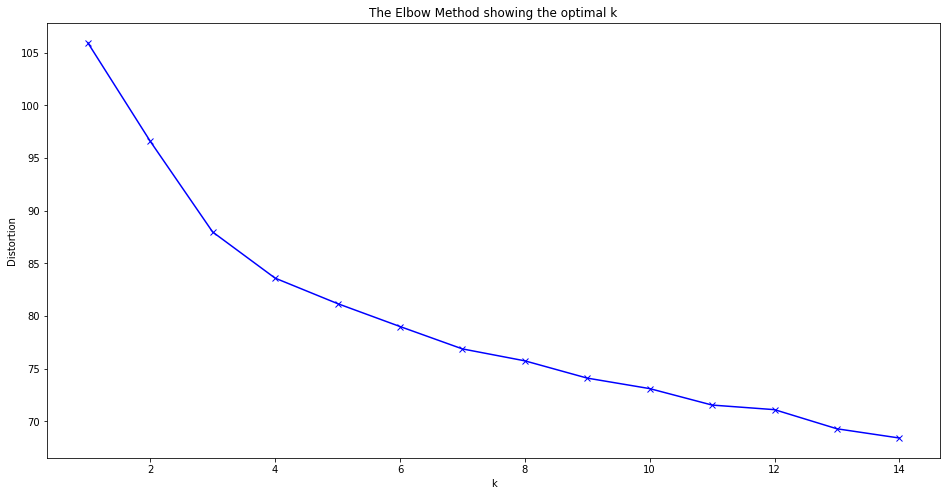

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


From the graph above I think **8** clusters will be good.

In [58]:
kclusters = 10

Kmeans = KMeans(n_clusters= kclusters, random_state = 42)
Kmeans.fit(mpdcb_grouped_clustering)
print('==========================================================================================================')
print('First ten cluster labels are:', end="")
print(Kmeans.labels_[:10])
print('==========================================================================================================')


First ten cluster labels are:[6 7 7 2 2 6 2 2 7 2]


Now let's create the new dataframe which will contain **Neighborhood**, **Latitude**, **Longitude**, and **Top 10 Most common venues**. It will help us visualize our data on the maps.

In [59]:
mpdcb_data = mpdcb_venues.groupby('Neighborhood').mean().reset_index()[['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude']]
mpdcb_data.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude
0,Adarsh Nagar,28.614192,77.071541
1,Adyar,13.006450,80.257779
2,Agripada,18.977700,72.827300
3,Akurdi,18.648642,73.764708
4,Alandur,12.994373,80.194284


In [60]:
mpdcb_data.dtypes

Neighborhood               object
Neighborhood Latitude     float64
Neighborhood Longitude    float64
dtype: object

In [61]:
neighborhoods_venues_sorted.dtypes

Neighborhood              object
1st Most Common Venue     object
2nd Most Common Venue     object
3rd Most Common Venue     object
4th Most Common Venue     object
5th Most Common Venue     object
6th Most Common Venue     object
7th Most Common Venue     object
8th Most Common Venue     object
9th Most Common Venue     object
10th Most Common Venue    object
dtype: object

Now add **Cluster Labels** to the columns.

In [62]:
# add clustering labels

neighborhoods_venues_sorted.insert(0,'Cluster Labels', Kmeans.labels_)

# merge toronot grouped with toronto_data to add teh latitude/longitude for each neighborhood
mpdcb_merged = mpdcb_data.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on = "Neighborhood")

mpdcb_merged.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adarsh Nagar,28.614192,77.071541,6,Indian Restaurant,Fast Food Restaurant,Business Service,Flower Shop,Field,Fish & Chips Shop,Fish Market,Flea Market,Food,Coworking Space
1,Adyar,13.006450,80.257779,7,Indian Restaurant,North Indian Restaurant,Electronics Store,Ice Cream Shop,Juice Bar,Rock Club,Movie Theater,Bakery,Shoe Store,Grocery Store
2,Agripada,18.977700,72.827300,7,Indian Restaurant,Coffee Shop,Bakery,Restaurant,Gym,Food & Drink Shop,Food,Food Court,Flower Shop,Fabric Shop
3,Akurdi,18.648642,73.764708,2,Café,Fast Food Restaurant,Indian Restaurant,Juice Bar,Breakfast Spot,Middle Eastern Restaurant,Tea Room,Bakery,Asian Restaurant,Train
4,Alandur,12.994373,80.194284,2,Restaurant,Metro Station,Zoo,Flea Market,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flower Shop


Now we will determine how differents clusters are dissimilar from each other.

##### Cluster Label: 0

In [63]:
cluster0_df = mpdcb_merged.loc[mpdcb_merged['Cluster Labels'] == 0, mpdcb_merged.columns[[0] + list(range(4, mpdcb_merged.shape[1]))]]
cluster0_count = cluster0_df.shape[0]
print('======================================================')
print('There are {} Neighborhoods belongs to the cluster 0.'.format(cluster0_count))
print('======================================================')
cluster0_df

There are 23 Neighborhoods belongs to the cluster 0.


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,Arumbakkam,Men's Store,Clothing Store,Pizza Place,Liquor Store,Department Store,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market
31,Banashankari,Indian Restaurant,Department Store,Liquor Store,Juice Bar,Pizza Place,Dance Studio,Deli / Bodega,French Restaurant,Food Truck,Food Service
69,Chetpet,Indian Restaurant,Women's Store,Ice Cream Shop,Performing Arts Venue,Café,Department Store,Train Station,Flea Market,Fast Food Restaurant,Field
84,"Dabri, New Delhi",Movie Theater,Grocery Store,Department Store,Flea Market,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Zoo
114,George Town,Indian Restaurant,Fast Food Restaurant,Restaurant,Market,Department Store,Flea Market,Field,Fish & Chips Shop,Fish Market,Flower Shop
139,Hulimavu,ATM,Lake,Department Store,Badminton Court,Flower Shop,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market
178,Khadki,Department Store,Bakery,Athletics & Sports,Zoo,Flower Shop,Field,Fish & Chips Shop,Fish Market,Flea Market,Food
190,Korukkupet,Vegetarian / Vegan Restaurant,Spa,Department Store,Boutique,Indie Movie Theater,French Restaurant,Food Truck,Food Service,Fried Chicken Joint,Food Court
212,MMDA Colony,Event Space,Café,Hotel Bar,Department Store,Zoo,Flower Shop,Field,Fish & Chips Shop,Fish Market,Flea Market
222,Malabar Hill,Indian Restaurant,Coffee Shop,Lighthouse,Gym,Department Store,Convenience Store,Ice Cream Shop,Amphitheater,Cupcake Shop,Fruit & Vegetable Store


It's really tough to say what venue categories are common in these neighborhoods which makes them similar to each other. We will examine these neighborhoods with top5 most common venues with their frequency.

In [64]:
# function to print most common venues along with their frequency for each neighborhood in dataframe
def top_venues(df, num_top_venues=5):
    for hood in df['Neighborhood']:
        print("--------" + hood+ "----------")
        temp = mpdcb_grouped[mpdcb_grouped['Neighborhood'] == hood].T.reset_index()
        temp.columns = ['venue', 'freq']
        temp = temp.iloc[1:]
        temp['freq'] = temp['freq'].astype(float)
        temp = temp.round({'freq': 2})
        print(temp.sort_values('freq', ascending=False).reset_index(drop= True).head(num_top_venues))
        print('\n')

In [65]:
top_venues(cluster0_df)

--------Arumbakkam----------
              venue  freq
0      Liquor Store   0.2
1       Pizza Place   0.2
2  Department Store   0.2
3       Men's Store   0.2
4    Clothing Store   0.2


--------Banashankari----------
               venue  freq
0        Pizza Place   0.2
1  Indian Restaurant   0.2
2   Department Store   0.2
3          Juice Bar   0.2
4       Liquor Store   0.2


--------Chetpet----------
               venue  freq
0               Café  0.14
1      Women's Store  0.14
2  Indian Restaurant  0.14
3   Department Store  0.14
4     Ice Cream Shop  0.14


--------Dabri, New Delhi----------
              venue  freq
0     Movie Theater  0.50
1  Department Store  0.25
2     Grocery Store  0.25
3               ATM  0.00
4       Music Store  0.00


--------George Town----------
                  venue  freq
0  Fast Food Restaurant   0.2
1     Indian Restaurant   0.2
2                Market   0.2
3      Department Store   0.2
4            Restaurant   0.2


--------Hulimavu-------

**Cluster 0** contains high frequency of Pizza places, ATM, Movie Theatre and here and there some departments store.

##### Cluster Label: 1

In [66]:
cluster1_df = mpdcb_merged.loc[mpdcb_merged['Cluster Labels'] == 1, mpdcb_merged.columns[[0] + list(range(4, mpdcb_merged.shape[1]))]]
cluster1_count = cluster1_df.shape[0]
print('======================================================')
print('There are {} Neighborhoods belongs to the cluster 1.'.format(cluster1_count))
print('======================================================')
cluster1_df

There are 23 Neighborhoods belongs to the cluster 1.


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
45,Bhamburde (now called Shivajinagar),Historic Site,Snack Place,Bakery,Gym,Bus Station,Theater,Stationery Store,Fish Market,Farmers Market,Fast Food Restaurant
65,Charholi Budruk,Historic Site,Snack Place,Bakery,Gym,Bus Station,Theater,Stationery Store,Fish Market,Farmers Market,Fast Food Restaurant
94,Dhankawadi,Historic Site,Snack Place,Bakery,Gym,Bus Station,Theater,Stationery Store,Fish Market,Farmers Market,Fast Food Restaurant
99,Dighi,Historic Site,Snack Place,Bakery,Gym,Bus Station,Theater,Stationery Store,Fish Market,Farmers Market,Fast Food Restaurant
103,Dudulgaon,Historic Site,Snack Place,Bakery,Gym,Bus Station,Theater,Stationery Store,Fish Market,Farmers Market,Fast Food Restaurant
109,Erandwane,Historic Site,Snack Place,Bakery,Gym,Bus Station,Theater,Stationery Store,Fish Market,Farmers Market,Fast Food Restaurant
156,Kalas,Historic Site,Snack Place,Bakery,Gym,Bus Station,Theater,Stationery Store,Fish Market,Farmers Market,Fast Food Restaurant
167,Karol Bagh,Snack Place,Dessert Shop,Hotel,Flower Shop,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market
171,Kathirvedu,Snack Place,Zoo,Flower Shop,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Food
230,Manjri,Historic Site,Snack Place,Bakery,Gym,Bus Station,Theater,Stationery Store,Fish Market,Farmers Market,Fast Food Restaurant


In [67]:
top_venues(cluster1_df)

--------Bhamburde (now called Shivajinagar)----------
           venue  freq
0  Historic Site  0.25
1        Theater  0.12
2    Bus Station  0.12
3    Snack Place  0.12
4            Gym  0.12


--------Charholi Budruk----------
           venue  freq
0  Historic Site  0.25
1        Theater  0.12
2    Bus Station  0.12
3    Snack Place  0.12
4            Gym  0.12


--------Dhankawadi----------
           venue  freq
0  Historic Site  0.25
1        Theater  0.12
2    Bus Station  0.12
3    Snack Place  0.12
4            Gym  0.12


--------Dighi----------
           venue  freq
0  Historic Site  0.25
1        Theater  0.12
2    Bus Station  0.12
3    Snack Place  0.12
4            Gym  0.12


--------Dudulgaon----------
           venue  freq
0  Historic Site  0.25
1        Theater  0.12
2    Bus Station  0.12
3    Snack Place  0.12
4            Gym  0.12


--------Erandwane----------
           venue  freq
0  Historic Site  0.25
1        Theater  0.12
2    Bus Station  0.12
3    Snack 

From above dataframe it is clear that **Cluster 1** contains venues with Historic site, Theatre, Bus station, Gym, Bakery, Snack place. There are others we can see in dataframe but, after examining frequencies we can see there frequencies are 0.0 in almost every neighborhoood.

##### Cluster Label: 2

In [68]:
cluster2_df = mpdcb_merged.loc[mpdcb_merged['Cluster Labels'] == 2, mpdcb_merged.columns[[0] + list(range(4, mpdcb_merged.shape[1]))]]
cluster2_count = cluster2_df.shape[0]
print('======================================================')
print('There are {} Neighborhoods belongs to the cluster 2.'.format(cluster2_count))
print('======================================================')
cluster2_df

There are 169 Neighborhoods belongs to the cluster 2.


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Akurdi,Café,Fast Food Restaurant,Indian Restaurant,Juice Bar,Breakfast Spot,Middle Eastern Restaurant,Tea Room,Bakery,Asian Restaurant,Train
4,Alandur,Restaurant,Metro Station,Zoo,Flea Market,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flower Shop
6,Altamount Road,Café,Sandwich Place,Indian Restaurant,Pizza Place,Bakery,Gym / Fitness Center,Coffee Shop,Theater,Farmers Market,Fast Food Restaurant
7,Alwarthirunagar,Clothing Store,Pizza Place,Gym,Smoke Shop,Fast Food Restaurant,Café,Tea Room,Zoo,Farmers Market,Field
9,Amboli,Indian Restaurant,Coffee Shop,Halal Restaurant,Sandwich Place,Fast Food Restaurant,Chinese Restaurant,Gym,Flower Shop,Flea Market,Fabric Shop
...,...,...,...,...,...,...,...,...,...,...,...
429,Whitefield,Bakery,Department Store,Eastern European Restaurant,Café,Diner,Kerala Restaurant,Gym / Fitness Center,Hotel,Hotel Bar,Food & Drink Shop
430,Worli,Ice Cream Shop,Indian Restaurant,Seafood Restaurant,Fast Food Restaurant,Café,Sandwich Place,Diner,Gourmet Shop,Bakery,Sporting Goods Shop
431,Yamuna Vihar,Mobile Phone Shop,Flower Shop,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Food,Frozen Yogurt Shop
433,Yerwada,Donut Shop,Zoo,Flower Shop,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Food,Falafel Restaurant


In [69]:
top_venues(cluster2_df)

--------Akurdi----------
                  venue  freq
0                  Café  0.14
1  Fast Food Restaurant  0.14
2                Bakery  0.07
3                 Train  0.07
4           Snack Place  0.07


--------Alandur----------
            venue  freq
0      Restaurant   0.5
1   Metro Station   0.5
2             ATM   0.0
3          Museum   0.0
4  Nightlife Spot   0.0


--------Altamount Road----------
               venue  freq
0     Sandwich Place   0.2
1               Café   0.2
2        Pizza Place   0.1
3            Theater   0.1
4  Indian Restaurant   0.1


--------Alwarthirunagar----------
                  venue  freq
0        Clothing Store  0.25
1           Pizza Place  0.12
2  Fast Food Restaurant  0.12
3            Smoke Shop  0.12
4                   Gym  0.12


--------Amboli----------
                  venue  freq
0      Halal Restaurant  0.14
1  Fast Food Restaurant  0.14
2     Indian Restaurant  0.14
3    Chinese Restaurant  0.14
4                   Gym  0.14


-

**Cluster 2** is the largest and most miscelleaneous cluster. Mostly it contains differenct categories of restaurants such as Italian, Mexican, Eastern European, Modern European, chinese, Vietnamese and South Indian. It also contains neighborhoods with Beaches, cafe, Bakery, Gym and pool site. There are some neighborhoods with multiplexes also. It seems these Neighborhoods are mostly located in centre of city.

##### Cluster Label: 3

In [70]:
cluster3_df = mpdcb_merged.loc[mpdcb_merged['Cluster Labels'] == 3, mpdcb_merged.columns[[0] + list(range(4, mpdcb_merged.shape[1]))]]
cluster3_count = cluster3_df.shape[0]
print('======================================================')
print('There are {} Neighborhoods belongs to the cluster 3.'.format(cluster3_count))
print('======================================================')
cluster3_df

There are 38 Neighborhoods belongs to the cluster 3.


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,Annanur,Indian Restaurant,Platform,Restaurant,Fast Food Restaurant,Accessories Store,Flea Market,Farmers Market,Field,Fish & Chips Shop,Fish Market
22,Athipattu,Indian Restaurant,Platform,Restaurant,Fast Food Restaurant,Accessories Store,Flea Market,Farmers Market,Field,Fish & Chips Shop,Fish Market
25,Ayappakkam.,Indian Restaurant,Platform,Restaurant,Fast Food Restaurant,Accessories Store,Flea Market,Farmers Market,Field,Fish & Chips Shop,Fish Market
67,Chembarambakkam,Indian Restaurant,Platform,Restaurant,Fast Food Restaurant,Accessories Store,Flea Market,Farmers Market,Field,Fish & Chips Shop,Fish Market
110,Erukanchery,Indian Restaurant,Platform,Restaurant,Fast Food Restaurant,Accessories Store,Flea Market,Farmers Market,Field,Fish & Chips Shop,Fish Market
159,Kallikuppam,Indian Restaurant,Platform,Restaurant,Fast Food Restaurant,Accessories Store,Flea Market,Farmers Market,Field,Fish & Chips Shop,Fish Market
165,Karambakkam,Indian Restaurant,Platform,Restaurant,Fast Food Restaurant,Accessories Store,Flea Market,Farmers Market,Field,Fish & Chips Shop,Fish Market
169,Kasarwadi,Indian Restaurant,Bus Station,Mobile Phone Shop,Fast Food Restaurant,Platform,Airport,Farmers Market,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant
174,Keelkattalai,Indian Restaurant,Platform,Restaurant,Fast Food Restaurant,Accessories Store,Flea Market,Farmers Market,Field,Fish & Chips Shop,Fish Market
175,Kelambakkam,Indian Restaurant,Platform,Restaurant,Fast Food Restaurant,Accessories Store,Flea Market,Farmers Market,Field,Fish & Chips Shop,Fish Market


In [71]:
top_venues(cluster3_df)

--------Annanur----------
                  venue  freq
0              Platform  0.33
1     Indian Restaurant  0.33
2            Restaurant  0.17
3  Fast Food Restaurant  0.17
4         Movie Theater  0.00


--------Athipattu----------
                  venue  freq
0              Platform  0.33
1     Indian Restaurant  0.33
2            Restaurant  0.17
3  Fast Food Restaurant  0.17
4         Movie Theater  0.00


--------Ayappakkam.----------
                  venue  freq
0              Platform  0.33
1     Indian Restaurant  0.33
2            Restaurant  0.17
3  Fast Food Restaurant  0.17
4         Movie Theater  0.00


--------Chembarambakkam----------
                  venue  freq
0              Platform  0.33
1     Indian Restaurant  0.33
2            Restaurant  0.17
3  Fast Food Restaurant  0.17
4         Movie Theater  0.00


--------Erukanchery----------
                  venue  freq
0              Platform  0.33
1     Indian Restaurant  0.33
2            Restaurant  0.17
3  F

**Cluster 3** is very specific one. It contains Platform, Indian Restaurants, Fast food restaurants/Restaurant. We can see more similar places in dataframe but after examining the frequencies it shows the 0.0 frequency.

##### Cluster Label: 4

In [72]:
cluster4_df = mpdcb_merged.loc[mpdcb_merged['Cluster Labels'] == 4, mpdcb_merged.columns[[0] + list(range(4, mpdcb_merged.shape[1]))]]
cluster4_count = cluster4_df.shape[0]
print('======================================================')
print('There are {} Neighborhoods belongs to the cluster 4.'.format(cluster4_count))
print('======================================================')
cluster4_df

There are 15 Neighborhoods belongs to the cluster 4.


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
50,Bhuleshwar,Indian Restaurant,Cheese Shop,Market,Food,Fast Food Restaurant,Restaurant,Ice Cream Shop,American Restaurant,Amphitheater,Furniture / Home Store
85,Dagdi Chawl,Indian Restaurant,Restaurant,Flea Market,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flower Shop,Fabric Shop
120,Gottigere,Indian Restaurant,Department Store,Chinese Restaurant,Flower Shop,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Food
166,Karapakkam,Indian Restaurant,Movie Theater,Hotel,Flea Market,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Food
186,Kolathur,Indian Restaurant,Pharmacy,Department Store,Flower Shop,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market
243,Medavakkam,Indian Restaurant,Vegetarian / Vegan Restaurant,Flea Market,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flower Shop,Fabric Shop
260,Nahur,Indian Restaurant,Restaurant,Ice Cream Shop,Afghan Restaurant,Falafel Restaurant,Fried Chicken Joint,French Restaurant,Food Truck,Food Service,Food Court
317,Porur,Indian Restaurant,Restaurant,Department Store,Travel & Transport,Flea Market,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market
335,Ravet,Indian Restaurant,Flower Shop,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Food,Yoga Studio
361,Shivane,Indian Restaurant,Flower Shop,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Food,Yoga Studio


In [73]:
top_venues(cluster4_df)

--------Bhuleshwar----------
                  venue  freq
0     Indian Restaurant  0.53
1  Fast Food Restaurant  0.07
2                Market  0.07
3   American Restaurant  0.07
4        Ice Cream Shop  0.07


--------Dagdi Chawl----------
               venue  freq
0  Indian Restaurant  0.75
1         Restaurant  0.25
2             Museum  0.00
3     Nightlife Spot  0.00
4          Nightclub  0.00


--------Gottigere----------
                venue  freq
0   Indian Restaurant  0.50
1  Chinese Restaurant  0.25
2    Department Store  0.25
3                 ATM  0.00
4         Music Venue  0.00


--------Karapakkam----------
               venue  freq
0  Indian Restaurant  0.50
1              Hotel  0.25
2      Movie Theater  0.25
3          Multiplex  0.00
4     Nightlife Spot  0.00


--------Kolathur----------
               venue  freq
0  Indian Restaurant  0.50
1           Pharmacy  0.25
2   Department Store  0.25
3                ATM  0.00
4             Museum  0.00


--------Medav

We can clearly see that **Cluster 4** contains high frequency of Indian Restaurants.

##### Cluster Label: 5

In [74]:
cluster5_df = mpdcb_merged.loc[mpdcb_merged['Cluster Labels'] == 5, mpdcb_merged.columns[[0] + list(range(4, mpdcb_merged.shape[1]))]]
cluster5_count = cluster5_df.shape[0]
print('======================================================')
print('There are {} Neighborhoods belongs to the cluster 5.'.format(cluster5_count))
print('======================================================')
cluster5_df

There are 1 Neighborhoods belongs to the cluster 5.


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
42,Begur,Playground,Flea Market,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flower Shop,Cosmetics Shop


In [75]:
top_venues(cluster5_df)

--------Begur----------
            venue  freq
0      Playground   1.0
1          Museum   0.0
2    Noodle House   0.0
3  Nightlife Spot   0.0
4       Nightclub   0.0




**Cluster 5** contains only playground with one Neighborhood.

##### Cluster Label: 6

In [76]:
cluster6_df = mpdcb_merged.loc[mpdcb_merged['Cluster Labels'] == 6, mpdcb_merged.columns[[0] + list(range(4, mpdcb_merged.shape[1]))]]
cluster6_count = cluster6_df.shape[0]
print('======================================================')
print('There are {} Neighborhoods belongs to the cluster 6.'.format(cluster6_count))
print('======================================================')
cluster6_df

There are 10 Neighborhoods belongs to the cluster 6.


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adarsh Nagar,Indian Restaurant,Fast Food Restaurant,Business Service,Flower Shop,Field,Fish & Chips Shop,Fish Market,Flea Market,Food,Coworking Space
5,Alapakkam,Indian Restaurant,Fast Food Restaurant,Snack Place,Flower Shop,Farmers Market,Field,Fish & Chips Shop,Fish Market,Flea Market,Food
40,Bavdhan Budruk,Indian Restaurant,Lake,Fast Food Restaurant,Flea Market,Farmers Market,Field,Fish & Chips Shop,Fish Market,Flower Shop,Fabric Shop
74,Choolai,Fast Food Restaurant,Zoo,Flower Shop,Farmers Market,Field,Fish & Chips Shop,Fish Market,Flea Market,Food,Yoga Studio
184,Kodungaiyur,Pharmacy,Fast Food Restaurant,Coffee Shop,Zoo,Flower Shop,Farmers Market,Field,Fish & Chips Shop,Fish Market,Flea Market
249,Mori Gate; Delhi (page does not exist),Boutique,Fast Food Restaurant,Food,Field,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Coworking Space
323,Punjabi Bagh,Fast Food Restaurant,Pizza Place,Garden Center,Bakery,Sandwich Place,Gym / Fitness Center,Food,Flower Shop,Flea Market,Fabric Shop
378,Thergaon,Fast Food Restaurant,Zoo,Flower Shop,Farmers Market,Field,Fish & Chips Shop,Fish Market,Flea Market,Food,Yoga Studio
387,Tilak Nagar (Delhi),Fast Food Restaurant,Indian Restaurant,Electronics Store,Flower Shop,Field,Fish & Chips Shop,Fish Market,Flea Market,Food,Falafel Restaurant
398,Vadgaon Budruk,Fast Food Restaurant,Snack Place,BBQ Joint,Zoo,Flea Market,Farmers Market,Field,Fish & Chips Shop,Fish Market,Food


In [77]:
top_venues(cluster6_df)

--------Adarsh Nagar----------
                  venue  freq
0      Business Service  0.33
1     Indian Restaurant  0.33
2  Fast Food Restaurant  0.33
3         Movie Theater  0.00
4         Moving Target  0.00


--------Alapakkam----------
                  venue  freq
0  Fast Food Restaurant   0.4
1     Indian Restaurant   0.4
2           Snack Place   0.2
3                Museum   0.0
4          Noodle House   0.0


--------Bavdhan Budruk----------
                  venue  freq
0  Fast Food Restaurant  0.33
1     Indian Restaurant  0.33
2                  Lake  0.33
3           Music Store  0.00
4          Noodle House  0.00


--------Choolai----------
                  venue  freq
0  Fast Food Restaurant   1.0
1                   ATM   0.0
2           Music Store   0.0
3          Noodle House   0.0
4        Nightlife Spot   0.0


--------Kodungaiyur----------
                  venue  freq
0           Coffee Shop  0.33
1              Pharmacy  0.33
2  Fast Food Restaurant  0.33
3   

**Cluster 6** mostly contains Neighborhoods with Fast Food Restaurants.

##### Cluster Label: 7

In [78]:
cluster7_df = mpdcb_merged.loc[mpdcb_merged['Cluster Labels'] == 7, mpdcb_merged.columns[[0] + list(range(4, mpdcb_merged.shape[1]))]]
cluster7_count = cluster7_df.shape[0]
print('======================================================')
print('There are {} Neighborhoods belongs to the cluster 7.'.format(cluster7_count))
print('======================================================')
cluster7_df

There are 124 Neighborhoods belongs to the cluster 7.


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Adyar,Indian Restaurant,North Indian Restaurant,Electronics Store,Ice Cream Shop,Juice Bar,Rock Club,Movie Theater,Bakery,Shoe Store,Grocery Store
2,Agripada,Indian Restaurant,Coffee Shop,Bakery,Restaurant,Gym,Food & Drink Shop,Food,Food Court,Flower Shop,Fabric Shop
8,Ambattur,Ice Cream Shop,Asian Restaurant,Movie Theater,Flea Market,Indian Restaurant,Airport,Fruit & Vegetable Store,Fried Chicken Joint,French Restaurant,Food Truck
12,Anand Vihar,Indian Restaurant,Soup Place,Indian Sweet Shop,Furniture / Home Store,Ice Cream Shop,Punjabi Restaurant,Pizza Place,Amphitheater,Fruit & Vegetable Store,Fried Chicken Joint
16,Arekere,Indian Restaurant,Sporting Goods Shop,Pizza Place,Ice Cream Shop,Athletics & Sports,Business Service,Café,Breakfast Spot,Liquor Store,Mughlai Restaurant
...,...,...,...,...,...,...,...,...,...,...,...
417,Vile Parle,Indian Restaurant,Bar,Hotel,Fast Food Restaurant,Spa,Café,Restaurant,Cantonese Restaurant,Beach,Seafood Restaurant
420,Vishrantwadi,Indian Restaurant,Shopping Mall,Gym,Café,South Indian Restaurant,Pizza Place,Food Service,Food & Drink Shop,Food,Hotel Pool
423,Wagholi,Indian Restaurant,Restaurant,Mobile Phone Shop,Pizza Place,ATM,Whisky Bar,Event Space,Food Truck,Food Service,Food Court
424,Wakad,Indian Restaurant,Garden,Chinese Restaurant,ATM,Wine Bar,Event Space,Food Truck,Food Service,Food Court,Food & Drink Shop


In [79]:
top_venues(cluster7_df)

--------Adyar----------
                     venue  freq
0        Indian Restaurant  0.29
1  North Indian Restaurant  0.06
2        Electronics Store  0.06
3             Dessert Shop  0.03
4     Fast Food Restaurant  0.03


--------Agripada----------
               venue  freq
0        Coffee Shop   0.2
1  Indian Restaurant   0.2
2                Gym   0.2
3         Restaurant   0.2
4             Bakery   0.2


--------Ambattur----------
               venue  freq
0     Ice Cream Shop  0.33
1  Indian Restaurant  0.17
2      Movie Theater  0.17
3        Flea Market  0.17
4   Asian Restaurant  0.17


--------Anand Vihar----------
                venue  freq
0   Indian Restaurant  0.25
1   Indian Sweet Shop  0.12
2  Punjabi Restaurant  0.12
3         Pizza Place  0.12
4          Soup Place  0.12


--------Arekere----------
                 venue  freq
0  Sporting Goods Shop  0.15
1    Indian Restaurant  0.15
2          Pizza Place  0.08
3   Athletics & Sports  0.04
4   Mughlai Restaurant 

This cluster is also a miscelleaneaous one. It mostly contains different stores such as Grocery, Department, Sports, Toys and Electronics stores. It also contains many food places such as pizza, cafe, pub, coffee shop. It doesn't have many restaurants as **cluster 2**. This cluster actualy contains Farmers market, Fish market venues also. It also contains neighborhoods with venues like bars.

##### Cluster Label:8

In [80]:
cluster8_df = mpdcb_merged.loc[mpdcb_merged['Cluster Labels'] == 8, mpdcb_merged.columns[[0] + list(range(4, mpdcb_merged.shape[1]))]]
cluster8_count = cluster8_df.shape[0]
print('======================================================')
print('There are {} Neighborhoods belongs to the cluster 8.'.format(cluster8_count))
print('======================================================')
cluster8_df

There are 13 Neighborhoods belongs to the cluster 8.


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
49,Bhukum,ATM,Flower Shop,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Food,Yoga Studio
70,Chikhli,ATM,Flower Shop,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Food,Yoga Studio
141,ICF Colony,ATM,Flower Shop,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Food,Yoga Studio
226,Manali,ATM,Flower Shop,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Food,Yoga Studio
227,Manali New Town,ATM,Flower Shop,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Food,Yoga Studio
240,Mathur MMDA,ATM,Flower Shop,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Food,Yoga Studio
267,Naveen Shahdara,ATM,Vegetarian / Vegan Restaurant,Mobile Phone Shop,French Restaurant,Food Truck,Food Service,Food Court,Food & Drink Shop,Food,Falafel Restaurant
290,Pallikaranai,ATM,Farmers Market,Other Repair Shop,Flea Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flower Shop,Fabric Shop
310,Pimple Nilakh,ATM,Flower Shop,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Food,Yoga Studio
325,Puzhal,ATM,Flower Shop,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Food,Yoga Studio


In [81]:
top_venues(cluster8_df)

--------Bhukum----------
            venue  freq
0             ATM   1.0
1          Museum   0.0
2    Noodle House   0.0
3  Nightlife Spot   0.0
4       Nightclub   0.0


--------Chikhli----------
            venue  freq
0             ATM   1.0
1          Museum   0.0
2    Noodle House   0.0
3  Nightlife Spot   0.0
4       Nightclub   0.0


--------ICF Colony----------
            venue  freq
0             ATM   1.0
1          Museum   0.0
2    Noodle House   0.0
3  Nightlife Spot   0.0
4       Nightclub   0.0


--------Manali----------
            venue  freq
0             ATM   1.0
1          Museum   0.0
2    Noodle House   0.0
3  Nightlife Spot   0.0
4       Nightclub   0.0


--------Manali New Town----------
            venue  freq
0             ATM   1.0
1          Museum   0.0
2    Noodle House   0.0
3  Nightlife Spot   0.0
4       Nightclub   0.0


--------Mathur MMDA----------
            venue  freq
0             ATM   1.0
1          Museum   0.0
2    Noodle House   0.0
3  Ni

**Cluster 8** contains neighborhoods with ATM venues.

##### Cluster Label: 9

In [82]:
cluster9_df = mpdcb_merged.loc[mpdcb_merged['Cluster Labels'] == 9, mpdcb_merged.columns[[0] + list(range(4, mpdcb_merged.shape[1]))]]
cluster9_count = cluster9_df.shape[0]
print('======================================================')
print('There are {} Neighborhoods belongs to the cluster 9.'.format(cluster9_count))
print('======================================================')
cluster9_df

There are 19 Neighborhoods belongs to the cluster 9.


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
27,"Badarpur, Delhi",ATM,Business Service,IT Services,Train Station,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market
60,Central,Pharmacy,Harbor / Marina,Train Station,Museum,Zoo,Fish & Chips Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field
79,Cotton Green,Bakery,Playground,Plaza,Department Store,Train Station,Zoo,Fish Market,Farmers Market,Fast Food Restaurant,Field
91,Dehu Road,ATM,Jewelry Store,Train Station,Juice Bar,Food Service,Food Court,Food & Drink Shop,Food,Food Truck,Fabric Shop
108,Ennore,Train Station,ATM,Art Gallery,Fabric Shop,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market
115,Ghorpadi,Gym,Train Station,Art Gallery,Fish Market,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Zoo
125,Guduvancherry,Pharmacy,Harbor / Marina,Train Station,Museum,Zoo,Fish & Chips Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field
131,Hadapsar,Train Station,Zoo,Flea Market,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flower Shop,Fabric Shop
172,Kathivakkam,ATM,Train Station,Flea Market,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flower Shop,Fabric Shop
191,Kosapet,Bike Rental / Bike Share,Train Station,Zoo,Flea Market,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flower Shop


In [83]:
top_venues(cluster9_df)

--------Badarpur, Delhi----------
              venue  freq
0               ATM  0.25
1     Train Station  0.25
2       IT Services  0.25
3  Business Service  0.25
4            Museum  0.00


--------Central----------
             venue  freq
0  Harbor / Marina  0.25
1           Museum  0.25
2         Pharmacy  0.25
3    Train Station  0.25
4   Nightlife Spot  0.00


--------Cotton Green----------
              venue  freq
0             Plaza   0.2
1     Train Station   0.2
2  Department Store   0.2
3            Bakery   0.2
4        Playground   0.2


--------Dehu Road----------
           venue  freq
0            ATM  0.25
1  Train Station  0.25
2  Jewelry Store  0.25
3      Juice Bar  0.25
4    Music Store  0.00


--------Ennore----------
                         venue  freq
0                Train Station   0.6
1                          ATM   0.2
2                  Art Gallery   0.2
3  Northeast Indian Restaurant   0.0
4                 Noodle House   0.0


--------Ghorpadi--------

This cluster contains Neighborhoods with venues like Train station, Art Gallery, Museum. It also contains Department store, Women's Store, clothing store, Cricket Ground, Concert Halls.

Now we will make different dataframes for all 5 cities with their cluster labels so that we can visulize each city differently.

**Mumbai**

In [84]:
mumbai_mask = [(neigh in mumbai_neighborhoods['Neighborhood'].to_list()) for neigh in mpdcb_merged['Neighborhood'].to_list()]
mumbai_cluster = mpdcb_merged[mumbai_mask]
mumbai_cluster

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Agripada,18.977700,72.827300,7,Indian Restaurant,Coffee Shop,Bakery,Restaurant,Gym,Food & Drink Shop,Food,Food Court,Flower Shop,Fabric Shop
6,Altamount Road,18.968100,72.809500,2,Café,Sandwich Place,Indian Restaurant,Pizza Place,Bakery,Gym / Fitness Center,Coffee Shop,Theater,Farmers Market,Fast Food Restaurant
9,Amboli,19.129300,72.843400,2,Indian Restaurant,Coffee Shop,Halal Restaurant,Sandwich Place,Fast Food Restaurant,Chinese Restaurant,Gym,Flower Shop,Flea Market,Fabric Shop
11,Amrut Nagar,19.102077,72.912835,2,Indian Restaurant,Café,Restaurant,Asian Restaurant,Fast Food Restaurant,Electronics Store,Coffee Shop,Clothing Store,Falafel Restaurant,Chinese Restaurant
18,Asalfa,19.091000,72.901000,2,Food Truck,Motorcycle Shop,Campground,Men's Store,Zoo,Flower Shop,Field,Fish & Chips Shop,Fish Market,Flea Market
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,Versova,19.120000,72.820000,2,Bar,Zoo,Flower Shop,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Food,Fruit & Vegetable Store
414,Vidyavihar,19.080000,72.896000,9,Fast Food Restaurant,Cricket Ground,Train Station,Bar,Zoo,Flea Market,Field,Fish & Chips Shop,Fish Market,Flower Shop
417,Vile Parle,19.100000,72.830000,7,Indian Restaurant,Bar,Hotel,Fast Food Restaurant,Spa,Café,Restaurant,Cantonese Restaurant,Beach,Seafood Restaurant
425,Walkeshwar,18.947596,72.795957,7,Indian Restaurant,Coffee Shop,Lighthouse,Ice Cream Shop,African Restaurant,Farmers Market,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck


In [85]:
mumbai_cluster_group = mumbai_cluster[['Neighborhood', 'Cluster Labels']].groupby('Cluster Labels').count().rename(columns= {'Neighborhood':'Count'})
mumbai_cluster_group

,Count
Cluster Labels,
0,2
2,41
4,3
7,27
9,3


In [86]:
# import rquired color library
import matplotlib.cm as cm
import matplotlib.colors as colors

def plot_cluster(city_latitude, city_longitude, city_cluster_df, k_clusters):
    map_clusters = folium.Map(location=[city_latitude, city_longitude], zoom_start=11)

    # set color scheme for the clusters
    x = np.arange(k_clusters)
    ys = [i + x + (i*x)**2 for i in range(k_clusters)]
    colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
    rainbow = [colors.rgb2hex(i) for i in colors_array]

    # add markers to the map
    markers_colors = []
    for lat, lon, poi, cluster in zip(city_cluster_df['Neighborhood Latitude'], city_cluster_df['Neighborhood Longitude'], city_cluster_df['Neighborhood'], city_cluster_df['Cluster Labels']):
        label = folium.Popup(str(poi) + " Cluster " + str(cluster) , parse_html= True)
        folium.CircleMarker(
        [lat,lon],
        radius = 5,
        popup = label,
        color = rainbow[cluster-1],
        fill= True,
        fill_color = rainbow[cluster-1],
        fill_opacity = 0.7).add_to(map_clusters)

    return(map_clusters)

In [87]:
mumbai_lat, mumbai_lng = city_lat_lng('Mumbai', 'Maharashtra')

In [88]:
mumbai_cluster_map = plot_cluster(mumbai_lat, mumbai_lng, mumbai_cluster, 10)
mumbai_cluster_map

##### Pune

In [89]:
pune_mask = [(neigh in pune_neighborhood['Neighborhood'].to_list()) for neigh in mpdcb_merged['Neighborhood'].to_list()]
pune_cluster = mpdcb_merged[pune_mask]
pune_cluster

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Akurdi,18.648642,73.764708,2,Café,Fast Food Restaurant,Indian Restaurant,Juice Bar,Breakfast Spot,Middle Eastern Restaurant,Tea Room,Bakery,Asian Restaurant,Train
23,Aundh,18.561883,73.810196,7,Indian Restaurant,Fast Food Restaurant,Sporting Goods Shop,Shopping Mall,Restaurant,Clothing Store,Electronics Store,Multiplex,Grocery Store,Plaza
28,Balewadi,18.582027,73.768983,2,IT Services,Zoo,Flower Shop,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Food
34,Baner,18.564243,73.776857,7,Indian Restaurant,Fast Food Restaurant,Café,Liquor Store,Motorcycle Shop,Ice Cream Shop,American Restaurant,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint
40,Bavdhan Budruk,18.529135,73.778700,6,Indian Restaurant,Lake,Fast Food Restaurant,Flea Market,Farmers Market,Field,Fish & Chips Shop,Fish Market,Flower Shop,Fabric Shop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,Wagholi,18.580630,73.983310,7,Indian Restaurant,Restaurant,Mobile Phone Shop,Pizza Place,ATM,Whisky Bar,Event Space,Food Truck,Food Service,Food Court
424,Wakad,18.610902,73.763796,7,Indian Restaurant,Garden,Chinese Restaurant,ATM,Wine Bar,Event Space,Food Truck,Food Service,Food Court,Food & Drink Shop
426,Wanowrie,18.488368,73.898667,2,Ice Cream Shop,Coffee Shop,Spa,Fast Food Restaurant,Café,Falafel Restaurant,Snack Place,Sandwich Place,Chinese Restaurant,Lounge
427,Warje,18.482044,73.800170,4,Indian Restaurant,Bar,Flower Shop,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Food,Fruit & Vegetable Store


In [92]:
pune_cluster_group = pune_cluster[['Neighborhood', 'Cluster Labels']].groupby('Cluster Labels').count().rename(columns= {'Neighborhood': 'Count'})
pune_cluster_group

,Count
Cluster Labels,
0,3
1,15
2,16
3,1
4,3
6,3
7,16
8,4
9,3


In [93]:
pune_cluster_map = plot_cluster(pune_lat, pune_lng, pune_cluster, 10)
pune_cluster_map

##### Delhi

In [95]:
delhi_mask = [(neigh in delhi_neighborhood['Neighborhood'].to_list()) for neigh in mpdcb_merged['Neighborhood'].to_list()]
delhi_cluster = mpdcb_merged[delhi_mask]
delhi_cluster

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adarsh Nagar,28.614192,77.071541,6,Indian Restaurant,Fast Food Restaurant,Business Service,Flower Shop,Field,Fish & Chips Shop,Fish Market,Flea Market,Food,Coworking Space
12,Anand Vihar,28.625691,77.101941,7,Indian Restaurant,Soup Place,Indian Sweet Shop,Furniture / Home Store,Ice Cream Shop,Punjabi Restaurant,Pizza Place,Amphitheater,Fruit & Vegetable Store,Fried Chicken Joint
20,Ashok Nagar (Delhi),28.636021,77.101822,2,North Indian Restaurant,Fast Food Restaurant,Café,Clothing Store,Fish Market,Farmers Market,Field,Fish & Chips Shop,Flea Market,Fabric Shop
21,Ashok Vihar,28.699453,77.184826,7,Indian Restaurant,Ice Cream Shop,Bakery,Diner,Flower Shop,Field,Fish & Chips Shop,Fish Market,Flea Market,Food
27,"Badarpur, Delhi",28.493170,77.303024,9,ATM,Business Service,IT Services,Train Station,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,Vasant Kunj,28.529249,77.154134,2,Vegetarian / Vegan Restaurant,Arcade,Bank,Clothing Store,Café,Bakery,Pizza Place,Food Court,Food & Drink Shop,Food
407,Vasant Vihar,28.560691,77.160791,2,Fast Food Restaurant,Café,Coffee Shop,Chinese Restaurant,Restaurant,Gourmet Shop,Nightlife Spot,Market,Donut Shop,Asian Restaurant
409,Vasundhara Enclave,28.601726,77.321123,2,Convenience Store,Pizza Place,Stadium,Market,Flea Market,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market
416,Vikaspuri,28.638419,77.070836,4,Indian Restaurant,Flea Market,Pizza Place,Hyderabadi Restaurant,French Restaurant,Food Service,Food Court,Food & Drink Shop,Food,Flower Shop


In [96]:
delhi_cluster_group = delhi_cluster[['Neighborhood', 'Cluster Labels']].groupby('Cluster Labels').count().rename(columns = {'Neighborhood': 'Count'})
delhi_cluster_group

,Count
Cluster Labels,
0,1
1,2
2,51
4,1
6,4
7,34
8,2
9,3


In [97]:
delhi_cluster_map = plot_cluster(delhi_lat, delhi_lng, delhi_cluster, 10)
delhi_cluster_map

##### Chennai

In [98]:
chennai_mask = [(neigh in chennai_neighborhood['Neighborhood'].to_list()) for neigh in mpdcb_merged['Neighborhood'].to_list()]
chennai_cluster = mpdcb_merged[chennai_mask]
chennai_cluster

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Adyar,13.006450,80.257779,7,Indian Restaurant,North Indian Restaurant,Electronics Store,Ice Cream Shop,Juice Bar,Rock Club,Movie Theater,Bakery,Shoe Store,Grocery Store
4,Alandur,12.994373,80.194284,2,Restaurant,Metro Station,Zoo,Flea Market,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flower Shop
5,Alapakkam,13.049901,80.165435,6,Indian Restaurant,Fast Food Restaurant,Snack Place,Flower Shop,Farmers Market,Field,Fish & Chips Shop,Fish Market,Flea Market,Food
7,Alwarthirunagar,13.047486,80.183669,2,Clothing Store,Pizza Place,Gym,Smoke Shop,Fast Food Restaurant,Café,Tea Room,Zoo,Farmers Market,Field
8,Ambattur,13.119375,80.150765,7,Ice Cream Shop,Asian Restaurant,Movie Theater,Flea Market,Indian Restaurant,Airport,Fruit & Vegetable Store,Fried Chicken Joint,French Restaurant,Food Truck
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,Veppery,13.087840,80.278470,3,Indian Restaurant,Platform,Restaurant,Fast Food Restaurant,Accessories Store,Flea Market,Farmers Market,Field,Fish & Chips Shop,Fish Market
418,Villivakkam,13.112588,80.208138,9,Train Station,Concert Hall,Fast Food Restaurant,Coffee Shop,Gift Shop,Zoo,Fish Market,Farmers Market,Field,Fish & Chips Shop
419,Virugambakkam,13.047543,80.192218,2,Pizza Place,Multiplex,Fast Food Restaurant,Sandwich Place,Chinese Restaurant,Movie Theater,Café,Tea Room,Field,Fish & Chips Shop
421,Vyasarpadi,13.116973,80.257124,1,Sandwich Place,Bus Station,Zoo,Flea Market,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flower Shop


In [133]:
chennai_cluster_group = chennai_cluster[['Neighborhood','Cluster Labels']].groupby('Cluster Labels').count().rename(columns = {'Neighborhood':'Count'})
chennai_cluster_group

,Count
Cluster Labels,
0,9
1,5
2,33
3,36
4,6
6,3
7,24
8,7
9,9


In [101]:
chennai_cluster_map = plot_cluster(chennai_lat, chennai_lng, chennai_cluster, 10)
chennai_cluster_map

##### Bangalore

In [102]:
bengaluru_mask = [(neigh in bengaluru_neighborhood['Neighborhood'].to_list()) for neigh in mpdcb_merged['Neighborhood'].to_list()]
bengaluru_cluster = mpdcb_merged[bengaluru_mask]
bengaluru_cluster

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Anjanapura,12.858081,77.558071,2,Pool,Zoo,Flower Shop,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Food
16,Arekere,12.887209,77.596049,7,Indian Restaurant,Sporting Goods Shop,Pizza Place,Ice Cream Shop,Athletics & Sports,Business Service,Café,Breakfast Spot,Liquor Store,Mughlai Restaurant
26,BTM Layout,12.915177,77.610282,7,Indian Restaurant,Vegetarian / Vegan Restaurant,Snack Place,Ice Cream Shop,Bakery,Sandwich Place,Gym,Fast Food Restaurant,Chinese Restaurant,Coffee Shop
31,Banashankari,12.915221,77.573598,0,Indian Restaurant,Department Store,Liquor Store,Juice Bar,Pizza Place,Dance Studio,Deli / Bodega,French Restaurant,Food Truck,Food Service
32,Banaswadi,13.014162,77.651854,7,Indian Restaurant,Vegetarian / Vegan Restaurant,BBQ Joint,Kerala Restaurant,Juice Bar,Fish Market,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,Vidyaranyapura,13.076641,77.557731,0,Indian Restaurant,Coffee Shop,Dessert Shop,Department Store,Pizza Place,Ice Cream Shop,American Restaurant,Fruit & Vegetable Store,Fried Chicken Joint,French Restaurant
415,Vijayanagar,12.971889,77.545789,0,Department Store,Indian Restaurant,Deli / Bodega,Food,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop
429,Whitefield,12.969637,77.749745,2,Bakery,Department Store,Eastern European Restaurant,Café,Diner,Kerala Restaurant,Gym / Fitness Center,Hotel,Hotel Bar,Food & Drink Shop
432,Yelahanka,13.100698,77.596345,9,ATM,Department Store,Train Station,Flower Shop,Food Service,Food Court,Food & Drink Shop,Food Truck,Food,Fabric Shop


In [104]:
bengaluru_cluster_group = bengaluru_cluster[['Neighborhood', 'Cluster Labels']].groupby('Cluster Labels').count().rename(columns = {'Neighborhood': 'Count'})
bengaluru_cluster_group

,Count
Cluster Labels,
0,8
1,1
2,27
4,2
5,1
7,23
9,1


In [105]:
bengaluru_cluster_map = plot_cluster(bengaluru_lat, bengaluru_lng, bengaluru_cluster, 10)
bengaluru_cluster_map

Now to compare the different cities we will form the dataframe containing the number of clusters for each city.

In [134]:
mp_cluster = pd.merge(mumbai_cluster_group.reset_index(), pune_cluster_group.reset_index(), on = 'Cluster Labels', how='outer', suffixes= (' Mumbai', ' Pune'))
mpd_cluster = pd.merge(mp_cluster, delhi_cluster_group.reset_index(), on = 'Cluster Labels', how = 'outer').rename(columns = {'Count':'Count Delhi'})
mpdc_cluster =pd.merge(mpd_cluster, chennai_cluster_group.reset_index(), on = 'Cluster Labels', how = 'outer').rename(columns = {'Count':'Count Chennai'})
mpdcb_cluster = pd.merge(mpdc_cluster, bengaluru_cluster_group.reset_index(), on = 'Cluster Labels', how = 'outer').rename(columns = {'Count': 'Count Bengaluru'}).replace(to_replace = {np.nan:0}, value= None)
mpdcb_cluster.sort_values(by = ['Cluster Labels'], inplace = True)
mpdcb_cluster

,Cluster Labels,Count Mumbai,Count Pune,Count Delhi,Count Chennai,Count Bengaluru
0,0,2.0,3.0,1.0,9.0,8.0
5,1,0.0,15.0,2.0,5.0,1.0
1,2,41.0,16.0,51.0,33.0,27.0
6,3,0.0,1.0,0.0,36.0,0.0
2,4,3.0,3.0,1.0,6.0,2.0
9,5,0.0,0.0,0.0,0.0,1.0
7,6,0.0,3.0,4.0,3.0,0.0
3,7,27.0,16.0,34.0,24.0,23.0
8,8,0.0,4.0,2.0,7.0,0.0
4,9,3.0,3.0,3.0,9.0,1.0


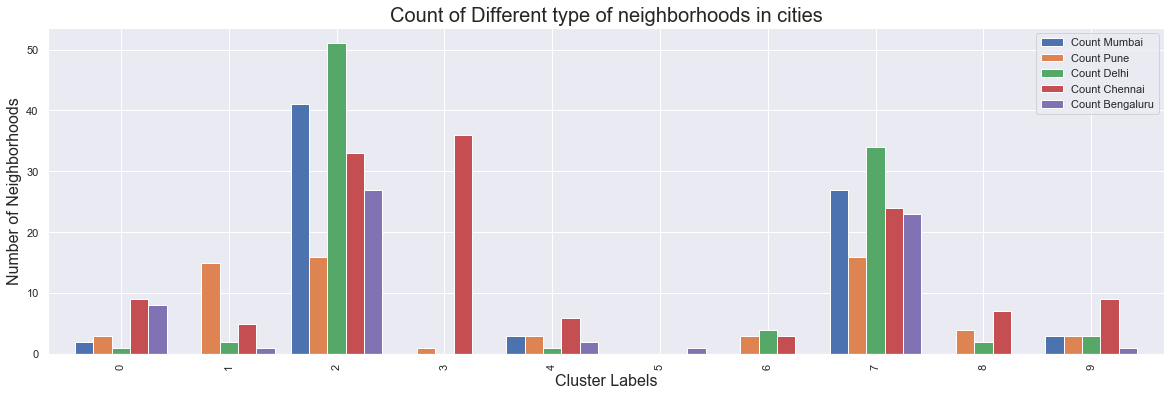

In [143]:
import seaborn as sns
sns.set()
mpdcb_cluster.plot(x= 'Cluster Labels',kind= 'bar',figsize=(20,6), grid = True, width = 0.85)
plt.xlabel('Cluster Labels', fontsize = 16)
plt.ylabel('Number of Neighborhoods', fontsize = 16)
plt.title('Count of Different type of neighborhoods in cities', fontsize = 20)
plt.show()

The above bar plot shows that most of the neighborhoods comes under the cluster 2 and cluster 7. This behaviour is obvious considering these two are the largest clusters out of all 10. Cluster 5 contains only one neighborhood which is in bangalore and contains playground venue. Almost all the cluster 3 neighborhoods located in chennai. But even from the bar plot it's hard to say which cities are more like other which is our motive. We will define customized dissimilarity metrics to measure the dissimilarity between two cities.

#### Customized dissimilarity metrics

We will take the **average of the squares of the difference between number of neighborhoods in specific cluster** for two cities. Higher the value of metrics more dissimilar cities are.

In [144]:
# customized dissimilarity metrics
def dissimilarity_metrics(city1,city2, df):
    square_diff = []
    for c1_value, c2_value in zip(df['Count {}'.format(city1)], df['Count {}'.format(city2)]):
        square_diff.append((c1_value - c2_value)**2)
    return(sum(square_diff)/len(square_diff))


We will check dissimilarity for all 10 combinations of cities.

In [145]:
city_combination = [('Mumbai', 'Pune'), ('Mumbai', 'Delhi'), ('Mumbai', 'Chennai'), ('Mumbai', 'Bengaluru'), ('Pune', 'Delhi'),
                   ('Pune', 'Chennai'), ('Pune', 'Bengaluru'), ('Delhi', 'Chennai'), ('Delhi', 'Bengaluru'), ('Chennai', 'Bengaluru')]
diss_met = []
for (city1, city2) in city_combination:
    diss_met.append(dissimilarity_metrics(city1, city2, mpdcb_cluster))

dissimilarity_df = pd.DataFrame({'Dissimilarity_metrics': diss_met}, index = city_combination)
dissimilarity_df
    

,Dissimilarity_metrics
"(Mumbai, Pune)",99.8
"(Mumbai, Delhi)",17.8
"(Mumbai, Chennai)",154.6
"(Mumbai, Bengaluru)",25.5
"(Pune, Delhi)",173.2
"(Pune, Chennai)",176.8
"(Pune, Bengaluru)",42.3
"(Delhi, Chennai)",188.0
"(Delhi, Bengaluru)",77.3
"(Chennai, Bengaluru)",148.9


## Results and Discussion<a name= 'resutls'></a>

We can see that **Mumbai and Delhi** are most similar to each other with lowest value of dissimilarity metrics. If we think about mumbai and delhi the outcome is as expected. If we observe carefully all the **combinations involving chennai** are very dissimilar to other. We can say that among all 5 cities **chennai is an outlier**. I actually involved chennai just for this, although chennai comes in one of the biggest cities of india it's not like other big cities. 

If we take look at the next most similar city combination it is **Mumbai and Bengaluru**. This is also expected considering Mumbai is financial capital of India and Bengaluru is the home of some of the IT giants in India. Similarly next most similar combination is **Pune and Bengaluru**. Pune and Bengaluru both are famous as IT industry hub in India.

Dissimilarity measure between **Mumbai and Pune** is unexpectedly **High**. Measure between **Delhi and Bengaluru** is also **High** considering **(Mumbai, Delhi) and (Mumbai, Bengaluru)** has **Smallest** two values.

looking at above dataframe we can say people moving from **Delhi to Mumbai** or vice-versa will not have to adjsut much as both of these cities are very much similar to each other. Oposite goes for **Chennai** i.e. any moving to chenaai or from chennai will experience larger difference.

Now if our clients are interested in opening their Bussiness in these cities they can use this analysis for better decision making. After choosing city for their new branch. They can look more into that city's neighborhood clusters to decide location in the city. It will need further research at Individual level to check out few shortlisted places. Clients which are moving from one city to another city can look for same neighborhood as they were living in previous city.

## Conclusion <a name='conclusion'></a>

Purpose of this project was to compare the 5 most dynamic and populated cities of **India**. Analyisng how similar or dissimilar these cities are from each other. By gathering venues details in each neighborhood from **Foursquare API**. We collected venue's category details and on the basis of that we clustered our  neighborhoods of all 5 cities at the same time. We difined the customized dissimilarity measurement **(average of the squares of the difference between number of neighborhoods in specific cluster)** to compare the cities more significantly.

Our clients can use it to decide the city to open their new branches of services. Hotel or Restaurant owners can look for neighborhood with less density of restaurants. City planner or Muncipality can use this analysis to decide for location of new parks which are unexpectedly has very low frequency. Obiviously it will require furthr analysis. Individual moving from one city to other can use it to decide the neighborhood to move in.